4. Linear Regression (House Price Prediction)
Imagine you are working as a data analyst for a real estate company. The
company wants to help customers estimate the price of a house before
purchase. You are given a dataset from Kaggle that contains details of
houses such as:
i) Size of the house (in square feet)
ii) Number of bedrooms
iii) Distance from the city center
iv) Age of the house
v) Price of the house
Your task is to build a Linear Regression model that predicts the house
price based on these features.
Instructions:
1. Load the dataset from Kaggle and explore it (missing values,
summary statistics).
2. Plot the relationship between house size and price.
3. Build a Simple Linear Regression model using only the size of the
house.
4. Extend it to Multiple Linear Regression using all features.
5. Evaluate the model using MSE, RMSE, and R² Score.
6. Plot the graph of actual vs. predicted prices. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Creating a sample dataset
data = {
    'Size_sqft': [850, 900, 1200, 1500, 1800, 2000, 2300, 2500, 2700, 3000],
    'Bedrooms': [2, 2, 3, 3, 4, 3, 4, 4, 5, 5],
    'Distance_city_km': [10, 8, 12, 15, 20, 10, 18, 25, 22, 30],
    'Age_yrs': [5, 4, 10, 15, 20, 8, 18, 25, 22, 30],
    'Price_lakhs': [45, 50, 65, 70, 80, 75, 90, 95, 110, 120]
}

df = pd.DataFrame(data)
print("Dataset:\n", df.head())


Dataset:
    Size_sqft  Bedrooms  Distance_city_km  Age_yrs  Price_lakhs
0        850         2                10        5           45
1        900         2                 8        4           50
2       1200         3                12       10           65
3       1500         3                15       15           70
4       1800         4                20       20           80


In [3]:
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Size_sqft         10 non-null     int64
 1   Bedrooms          10 non-null     int64
 2   Distance_city_km  10 non-null     int64
 3   Age_yrs           10 non-null     int64
 4   Price_lakhs       10 non-null     int64
dtypes: int64(5)
memory usage: 532.0 bytes
None

Summary Statistics:
         Size_sqft   Bedrooms  Distance_city_km    Age_yrs  Price_lakhs
count    10.000000  10.000000         10.000000  10.000000    10.000000
mean   1875.000000   3.500000         17.000000  15.700000    80.000000
std     755.443211   1.080123          7.272475   8.807194    24.267033
min     850.000000   2.000000          8.000000   4.000000    45.000000
25%    1275.000000   3.000000         10.500000   8.500000    66.250000
50%    1900.000000   3.500000         16.500000  16.500000    77.500

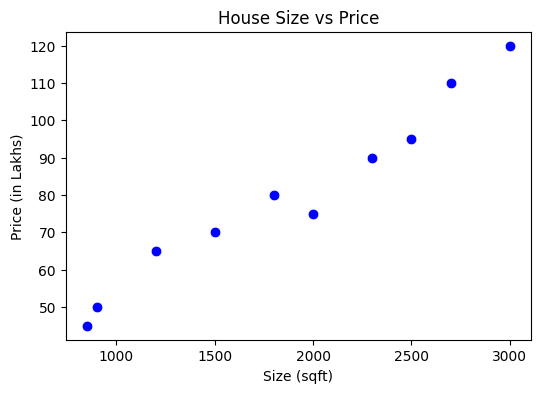

In [4]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Size_sqft', y='Price_lakhs', data=df, color='blue', s=60)
plt.title("House Size vs Price")
plt.xlabel("Size (sqft)")
plt.ylabel("Price (in Lakhs)")
plt.show()



Simple Linear Regression Results:
MSE: 13.656375447763029
RMSE: 3.69545334807017
R² Score: 0.9848262495024855


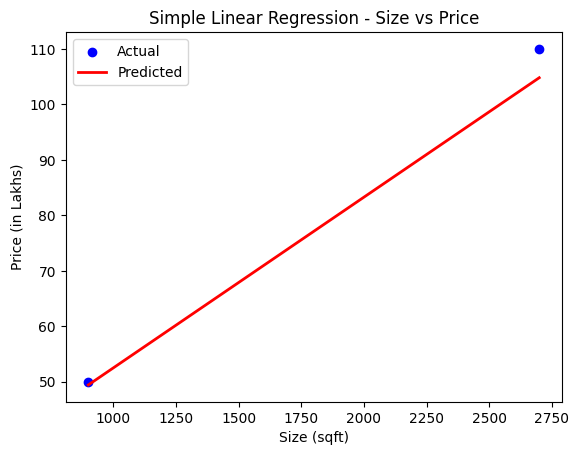

In [5]:
# Select feature and target - Simple Linear Regression (Size → Price)
X = df[['Size_sqft']]
y = df['Price_lakhs']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

# Predict
y_pred = simple_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nSimple Linear Regression Results:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

# Plot regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title("Simple Linear Regression - Size vs Price")
plt.xlabel("Size (sqft)")
plt.ylabel("Price (in Lakhs)")
plt.legend()
plt.show()


In [6]:
# Select multiple features - Multiple Linear Regression
X_multi = df[['Size_sqft', 'Bedrooms', 'Distance_city_km', 'Age_yrs']]
y = df['Price_lakhs']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Train the model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Predict
y_pred_multi = multi_model.predict(X_test)

# Evaluate
mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print("\nMultiple Linear Regression Results:")
print("MSE:", mse_multi)
print("RMSE:", rmse_multi)
print("R² Score:", r2_multi)

# Coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X_multi.columns, multi_model.coef_):
    print(f"{feature}: {coef:.2f}")



Multiple Linear Regression Results:
MSE: 6.947270490258738
RMSE: 2.635767533425271
R² Score: 0.9922808105663792

Model Coefficients:
Size_sqft: 0.02
Bedrooms: 9.82
Distance_city_km: 0.49
Age_yrs: -0.22


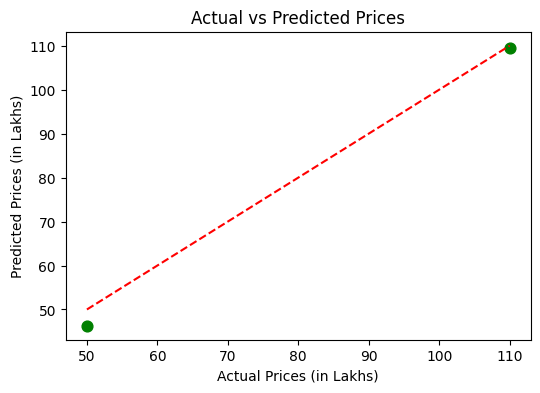

In [7]:
# Plot Actual vs Predicted Prices
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_multi, color='green', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices (in Lakhs)")
plt.ylabel("Predicted Prices (in Lakhs)")
plt.title("Actual vs Predicted Prices")
plt.show()


Interpretation

Simple Linear Regression → captures only one feature (Size).

Multiple Linear Regression → includes all house characteristics.

R² Score → how well the model explains the variation in price (closer to 1 = better).

RMSE → average prediction error (lower = better).